In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/test.csv')
test_df = pd.read_csv('/content/train.csv')

# Display the first 5 rows
print(df.head())
print(test_df.head())

                                              tweets       class
0  no one ever predicted this was going to happen...  figurative
1  @Stooshie its as closely related as Andrews or...  figurative
2  I find it ironic when Vegans say they love foo...  figurative
3  Quick rt that throwing money vine I've not see...  figurative
4  yep, keep adding me to your #devops lists.... ...  figurative
                                              tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative


In [3]:
df['class'].unique()

array(['figurative', nan, 'irony', 'regular', 'sarcasm'], dtype=object)

In [4]:
df.shape

(8128, 2)

In [5]:
num_nan = df['class'].isna().sum()
print(f"Number of rows with NaN label: {num_nan}")

Number of rows with NaN label: 9


In [6]:
# Replace class name as either 'Sarcasm' or 'Genuine'
def map_label(label):
    if label in ['sarcasm', 'irony']:
        return 'Sarcastic'
    elif label in ['regular', 'figurative']:
        return 'Genuine'
    else:
        return np.nan

df['label_binary'] = df['class'].apply(map_label)
df = df.dropna(subset=['label_binary'])  # Remove rows with no label

test_df['label_binary'] = test_df['class'].apply(map_label)
test_df = test_df.dropna(subset=['label_binary'])

In [7]:
print(df.head())
test_df.head()

                                              tweets       class label_binary
0  no one ever predicted this was going to happen...  figurative      Genuine
1  @Stooshie its as closely related as Andrews or...  figurative      Genuine
2  I find it ironic when Vegans say they love foo...  figurative      Genuine
3  Quick rt that throwing money vine I've not see...  figurative      Genuine
4  yep, keep adding me to your #devops lists.... ...  figurative      Genuine


,tweets,class,label_binary
0,Be aware dirty step to get money #staylight ...,figurative,Genuine
1,#sarcasm for #people who don't understand #diy...,figurative,Genuine
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,Genuine
3,@wilw Why do I get the feeling you like games?...,figurative,Genuine
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,Genuine


In [8]:
df.shape

(8119, 3)

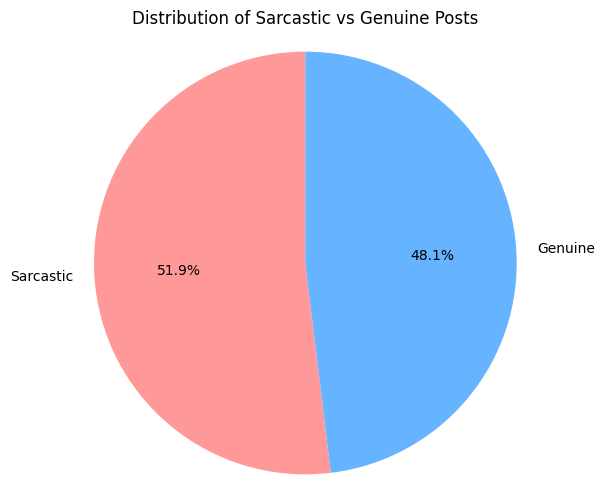

In [9]:
import matplotlib.pyplot as plt

# Count the label distribution
label_counts = df['label_binary'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
plt.title("Distribution of Sarcastic vs Genuine Posts")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


In [10]:
df[df['label_binary'] == 'Sarcastic'].head()

,tweets,class,label_binary
2046,@BBCTalkback nhs nurse hurts shoulder in work ...,irony,Sarcastic
2047,@jeffmeintzer @FoxNews @fxnscitech well wouldn...,irony,Sarcastic
2048,#IRONY Funny How more media reporters cover th...,irony,Sarcastic
2049,BigLaw firm asks for help improving efficiency...,irony,Sarcastic
2050,@klbraggg I was just making myself sad by watc...,irony,Sarcastic


In [11]:
!pip install emoji

In [12]:
import nltk
print(nltk.data.find('tokenizers/punkt'))

/root/nltk_data/tokenizers/punkt


In [13]:
import nltk
nltk.data.path.append('/home/yash-jadhav/nltk_data/tokenizers/punkt')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
#Preprocessing
import re
import emoji
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess tweet function
def preprocess_tweet(tweet):
    # 1. Convert to lowercase
    tweet = tweet.lower()

    # 2. Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)

    # 3. Remove mentions (@user)
    tweet = re.sub(r"@[\w]+", "", tweet)

    # 4. Remove HTML tags
    tweet = re.sub(r"<.*?>", "", tweet)  # This removes HTML tags like <div>, <span>, etc.

    # 5. Remove special characters and punctuation (keep emojis)
    tweet = re.sub(r"[^\w\s,']", "", tweet)

    # 6. Convert emojis to text (optional)
    tweet = emoji.demojize(tweet)

    # 7. Tokenization
    words = word_tokenize(tweet)

    # 8. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 9. Lemmatization (optional)
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a single string
    return " ".join(words).strip()

# Apply preprocessing to the 'tweets' column
df['processed_tweets'] = df['tweets'].apply(preprocess_tweet)

# Preview the cleaned data
print(df[['tweets', 'processed_tweets']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              tweets  \
0  no one ever predicted this was going to happen...   
1  @Stooshie its as closely related as Andrews or...   
2  I find it ironic when Vegans say they love foo...   
3  Quick rt that throwing money vine I've not see...   
4  yep, keep adding me to your #devops lists.... ...   

                                    processed_tweets  
0            one ever predicted going happen sarcasm  
1  closely related andrew original claim evolutio...  
2              find ironic vegan say love food irony  
3  quick rt throwing money vine 've seen 30 time ...  
4  yep , keep adding devops list justsaying infos...  


In [16]:
test_df['processed_tweets'] = test_df['tweets'].apply(preprocess_tweet)

In [17]:
test_df.head()

,tweets,class,label_binary,processed_tweets
0,Be aware dirty step to get money #staylight ...,figurative,Genuine,aware dirty step get money staylight staywhite...
1,#sarcasm for #people who don't understand #diy...,figurative,Genuine,sarcasm people n't understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,Genuine,dailymail reader sensible always shocker sarca...
3,@wilw Why do I get the feeling you like games?...,figurative,Genuine,get feeling like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,Genuine,probably missed text sarcastic


In [18]:
df.loc[4, 'processed_tweets']

'yep , keep adding devops list justsaying infosec irony'

In [19]:
df.head()

,tweets,class,label_binary,processed_tweets
0,no one ever predicted this was going to happen...,figurative,Genuine,one ever predicted going happen sarcasm
1,@Stooshie its as closely related as Andrews or...,figurative,Genuine,closely related andrew original claim evolutio...
2,I find it ironic when Vegans say they love foo...,figurative,Genuine,find ironic vegan say love food irony
3,Quick rt that throwing money vine I've not see...,figurative,Genuine,quick rt throwing money vine 've seen 30 time ...
4,"yep, keep adding me to your #devops lists.... ...",figurative,Genuine,"yep , keep adding devops list justsaying infos..."


In [20]:
# Drop the 'tweets' and 'class' columns
df = df.drop(columns=['tweets', 'class'])

# Display the first few rows to check the changes
df.head()

,label_binary,processed_tweets
0,Genuine,one ever predicted going happen sarcasm
1,Genuine,closely related andrew original claim evolutio...
2,Genuine,find ironic vegan say love food irony
3,Genuine,quick rt throwing money vine 've seen 30 time ...
4,Genuine,"yep , keep adding devops list justsaying infos..."


In [21]:
test_df = test_df.drop(columns=['tweets', 'class'])
test_df.head()

,label_binary,processed_tweets
0,Genuine,aware dirty step get money staylight staywhite...
1,Genuine,sarcasm people n't understand diy artattack
2,Genuine,dailymail reader sensible always shocker sarca...
3,Genuine,get feeling like game sarcasm
4,Genuine,probably missed text sarcastic


In [22]:
# Convert 'Sarcasm' to 1 and 'Genuine' to 0 in the 'binary_class' column
df['label_binary'] = df['label_binary'].replace({'Sarcasm': 1, 'Genuine': 0})

# Display the first few rows to check the changes
df.head()

,label_binary,processed_tweets
0,0,one ever predicted going happen sarcasm
1,0,closely related andrew original claim evolutio...
2,0,find ironic vegan say love food irony
3,0,quick rt throwing money vine 've seen 30 time ...
4,0,"yep , keep adding devops list justsaying infos..."


In [23]:
test_df['label_binary'] = test_df['label_binary'].replace({'Sarcasm': 1, 'Genuine': 0})

test_df.head()

,label_binary,processed_tweets
0,0,aware dirty step get money staylight staywhite...
1,0,sarcasm people n't understand diy artattack
2,0,dailymail reader sensible always shocker sarca...
3,0,get feeling like game sarcasm
4,0,probably missed text sarcastic


In [24]:
!pip install transformers tensorflow datasets

In [25]:
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [26]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from datasets import Dataset

In [27]:
# Load the tokenizer and BERT model for sequence classification
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # 2 labels: Sarcasm or Genuine

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
# Function to format the data suiatble for BERT
def preprocess_data(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
    return {
        'input_ids': np.array(encodings['input_ids']),
        'attention_mask': np.array(encodings['attention_mask']),
        'labels': np.array(labels)
    }

In [29]:
# Preprocess training and testing data
train_dataset = preprocess_data(df['processed_tweets'].tolist(), df['label_binary'].tolist())
test_dataset = preprocess_data(test_df['processed_tweets'].tolist(), test_df['label_binary'].tolist())

In [30]:
from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    train_dataset['input_ids'],
    train_dataset['attention_mask'],
    train_dataset['labels'],
    test_size=0.2,
    random_state=42
)

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [32]:
# Define the label mapping
label_map = {'Sarcastic': 1, 'Genuine': 0}

# Convert labels to integers, ensuring both numeric strings and text labels are handled correctly
def convert_label(label):
    if label in label_map:
        return label_map[label]  # If label is text (like 'Sarcastic'), convert it
    else:
        return int(label)  # If it's a numeric string (like '0'), convert it to int

# Apply this function to your labels
train_labels = np.array([convert_label(str(label)) for label in train_labels])
val_labels = np.array([convert_label(str(label)) for label in val_labels])
test_dataset['labels'] = np.array([convert_label(str(label)) for label in test_dataset['labels']])

# Print to check the result
print(np.unique(train_labels))  # Verify that labels are now numeric


[0 1]


In [33]:
import tensorflow as tf

# Create TensorFlow datasets for training and validation
train_data = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_inputs,
        'attention_mask': train_masks
    },
    train_labels
)).shuffle(1000).batch(16)

val_data = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_inputs,
        'attention_mask': val_masks
    },
    val_labels
)).batch(16)

# Test data
test_data = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_dataset['input_ids'],
        'attention_mask': test_dataset['attention_mask']
    },
    test_dataset['labels']
)).batch(16)


In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [36]:
# Train the model with validation
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3
)


Epoch 1/3
406/406 [==============================] - 125s 196ms/step - loss: 0.5304 - accuracy: 0.7239 - val_loss: 0.4987 - val_accuracy: 0.7389
Epoch 2/3
406/406 [==============================] - 74s 183ms/step - loss: 0.4910 - accuracy: 0.7495 - val_loss: 0.4960 - val_accuracy: 0.7389
Epoch 3/3
406/406 [==============================] - 70s 173ms/step - loss: 0.4889 - accuracy: 0.7498 - val_loss: 0.4962 - val_accuracy: 0.7389


In [37]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

5088/5088 [==============================] - 329s 63ms/step - loss: 0.4972 - accuracy: 0.7389
Test Loss: 0.4972222149372101, Test Accuracy: 0.7388585805892944


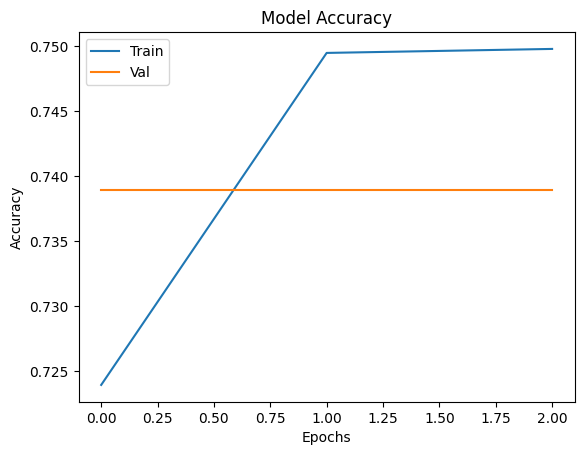

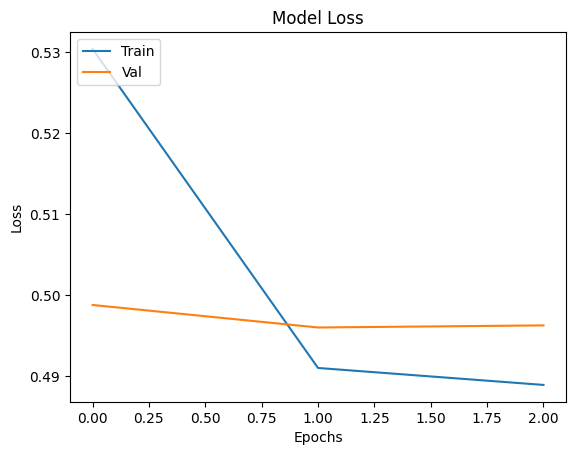

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [40]:
# Save the model
model.save('sarcasm_detection_model')

# Alternatively, save only the weights
# model.save_weights('sarcasm_detection_weights.h5')


In [41]:
import pickle
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Save tokenizer using pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [42]:
!zip -r sarcasm_detection_model.zip sarcasm_detection_model


  adding: sarcasm_detection_model/ (stored 0%)
  adding: sarcasm_detection_model/archive.zip (stored 0%)
  adding: sarcasm_detection_model/variables/ (stored 0%)
  adding: sarcasm_detection_model/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: sarcasm_detection_model/variables/variables.index (deflated 79%)
  adding: sarcasm_detection_model/keras_metadata.pb (deflated 95%)
  adding: sarcasm_detection_model/saved_model.pb (deflated 92%)
  adding: sarcasm_detection_model/assets/ (stored 0%)
  adding: sarcasm_detection_model/fingerprint.pb (stored 0%)


In [43]:
from google.colab import files
files.download('sarcasm_detection_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>